In [29]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import ticker

In [30]:
mwTQ_PATH = '/pscratch/sd/h/heroplr/R2_analysis_all/'
mwTQ = xr.open_mfdataset(mwTQ_PATH+'tep2_lot-101_trialbest.h5_mwv_aave9.nc')

In [31]:
lon = mwTQ.lon.values
lat = mwTQ.lat.values
mwT_tend = mwTQ.mwT_tend.values
mwT_pred = mwTQ.mwT_pred.values
mwQ_tend = mwTQ.mwQ_tend.values
mwQ_pred = mwTQ.mwQ_pred.values

In [32]:
nlevs = 50
mwT_pred_sum = np.sum(mwT_pred[nlevs:,:,:],axis=0)
mwT_tend_sum = np.sum(mwT_tend[nlevs:,:,:],axis=0)
mwQ_pred_sum = np.sum(mwQ_pred[nlevs:,:,:],axis=0)
mwQ_tend_sum = np.sum(mwQ_tend[nlevs:,:,:],axis=0)

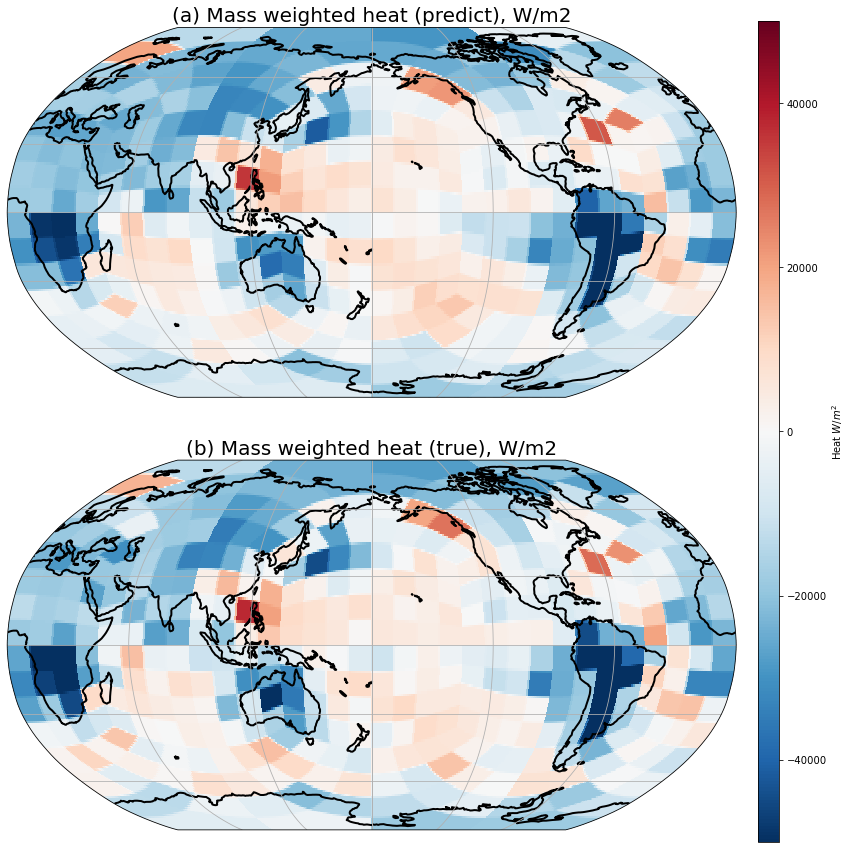

In [37]:
fig, ax = plt.subplots(2,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)
fz = 20
contour_plot = ax[0].pcolormesh(lon, lat, mwT_pred_sum,cmap='RdBu_r', vmin = -50000.0, vmax = 50000.0, transform=ccrs.PlateCarree())
ax[0].set_title('(a) Mass weighted heat (predict), W/m2', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()

contour_plot = ax[1].pcolormesh(lon, lat, mwT_tend_sum,cmap='RdBu_r', vmin = -50000.0, vmax = 50000.0, transform=ccrs.PlateCarree())
ax[1].set_title('(b) Mass weighted heat (true), W/m2', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.02, 0.76])
fig.colorbar(contour_plot, label="Heat "+r'$W/m^2$', cax=cbar_ax)
        #plt.suptitle("Trained DNN Skill for Vertically Resolved Tendencies", y = 0.97)
plt.subplots_adjust(hspace=0.13)
plt.savefig('Heat.pdf')

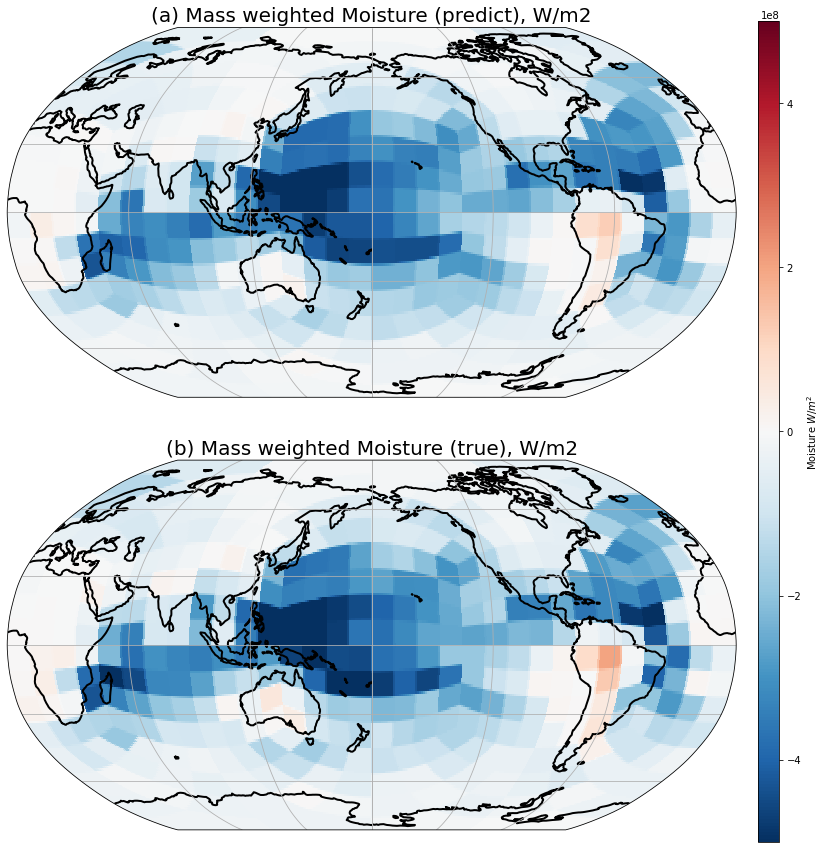

In [42]:
fig, ax = plt.subplots(2,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig.set_size_inches(15,15)
fz = 20
contour_plot = ax[0].pcolormesh(lon, lat, mwQ_pred_sum,cmap='RdBu_r', vmin = -500000000.0, vmax = 500000000.0, transform=ccrs.PlateCarree())
ax[0].set_title('(a) Mass weighted Moisture (predict), W/m2', fontsize = fz)
ax[0].coastlines(linewidth=2.0,edgecolor='0.25')
ax[0].gridlines()

contour_plot = ax[1].pcolormesh(lon, lat, mwQ_tend_sum,cmap='RdBu_r', vmin = -500000000.0, vmax = 500000000.0, transform=ccrs.PlateCarree())
ax[1].set_title('(b) Mass weighted Moisture (true), W/m2', fontsize = fz)
ax[1].coastlines(linewidth=2.0,edgecolor='0.25')
ax[1].gridlines()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.12, 0.02, 0.76])
fig.colorbar(contour_plot, label="Moisture "+r'$W/m^2$', cax=cbar_ax)
        #plt.suptitle("Trained DNN Skill for Vertically Resolved Tendencies", y = 0.97)
plt.subplots_adjust(hspace=0.13)
plt.savefig('Moisture.pdf')